# 1D convolutions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import linalg
import time

Consider the square wave discrete signal:

$$
\mathbf{v}_i=
\begin{cases}
0, & i = 1,\dots, 50 \\
1, & i = 51,\dots, 75 \\
0, & i = 76,\dots, 100 \\
\end{cases}
$$

Define the vector $\mathbf{v}$ and plot the corresponding signal.


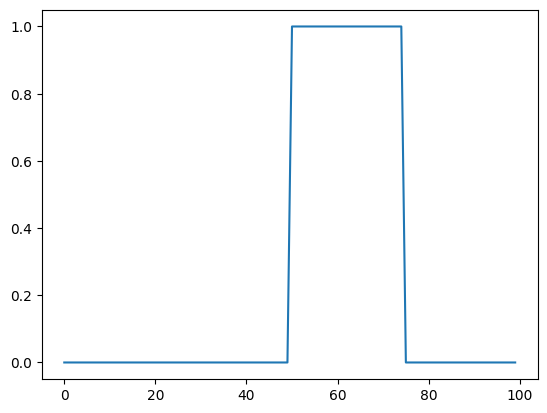

In [48]:
v = np.zeros(100)
v[50:75] = 1.0

plt.plot(v)

Consider the following kernels $\mathbf{k}$:


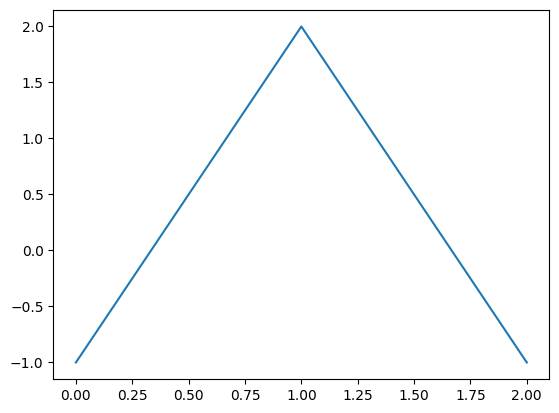

In [60]:
### first kernel
# k = np.ones(10) / 10.0

### second kernel
# k = signal.gaussian(20, std=3)
# k = k / np.sum(k)

### third kernel
k = np.array([-1, 2, -1])

plt.plot(k)

In what follows, we will compute the convolution between $\mathbf{v}$ and $\mathbf{k}$ in 4 different manners. At the end of each point, plot the obtained filtered (i.e. convolved) signal.


## 1. Toeplitz matrix

Define a Toeplitz matrix $K$ associated with the kernel $\mathbf{k}$.
Then, compute the convolution between $\mathbf{k}$ and $\mathbf{v}$, exploiting the property:

$\mathbf{k} * \mathbf{v} = K \mathbf{v}$


In [61]:
ti = time.time()
K = linalg.toeplitz(
    np.block([np.flip(k), np.zeros(v.shape[0] - k.shape[0])]),
    np.zeros(v.shape[0] - k.shape[0] + 1),
).transpose()
conv_toeplitz = K @ v
tf = time.time()

elapsed = tf - ti
print("Elapsed time: %1.2e" % elapsed)

Elapsed time: 4.70e-03


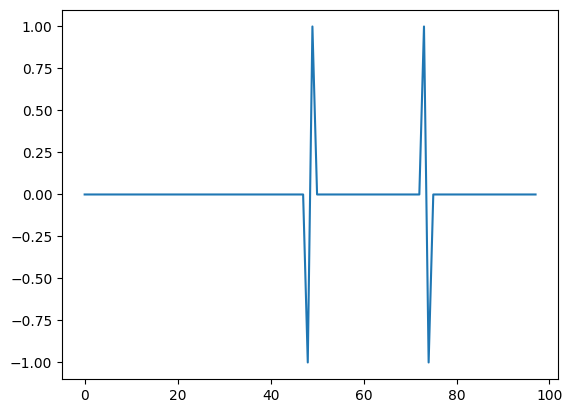

In [62]:
plt.plot(conv_toeplitz)

## 2. Direct definition (sums of products)

The convolution without "boundary layer" (i.e. the part of the vector which is identical between the standard and the circular convolutions), is given by:

$(\mathbf{k} * \mathbf{v})_i = \sum_{j = 0}^{n_k - 1} \mathbf{k}_{n_k - j} \mathbf{v}_{i + j}$

for $i = 1, \dots, n_v - n_k + 1$.


In [63]:
ti = time.time()
size = len(v) - len(k) + 1
conv_direct = np.zeros(size)
for i in range(len(v) - len(k) + 1):
    for j in range(len(k)):
        conv_direct[i] += k[-j - 1] * v[i + j]
tf = time.time()

elapsed = tf - ti
print("Elapsed time: %1.2e" % elapsed)

Elapsed time: 3.71e-04


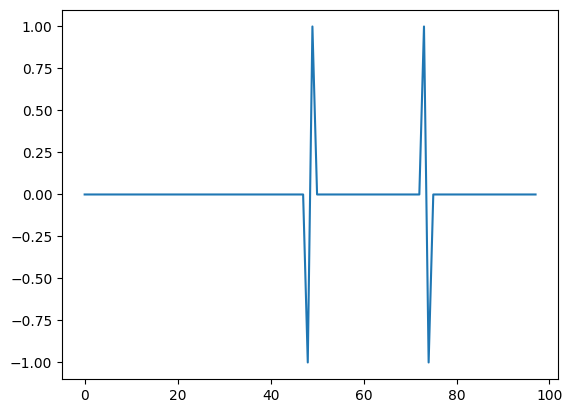

In [64]:
plt.plot(conv_direct)

## 3. Convolution through DFT

When the two signals have the same size, we have:

$ \widehat{\mathbf{v} \circledast \mathbf{k}} = \widehat{\mathbf{v}} \odot \widehat{\mathbf{k}} $

Where:

- $\hat{\mathbf{a}}$ is the DFT of the signal $\mathbf{a}$
- $\circledast$ is the circular convolution
- $\odot$ is the Hadamard product

When the two signals do not have the same size, the above formula can be applied simply by "zero-padding" the shorter signal (N.B: this is automatically done by the `numpy.fft.fft` command by passing the required length as second argument).

Besides the filtered signal, plot the DFT of the two signals and of their convolution.


In [65]:
from numpy.fft import fft, fftfreq, fftshift, ifft

ti = time.time()
V = fft(v)
K = fft(k, len(v))
VK = V * K
conv_dft = np.real(ifft(VK))
freq = fftfreq(len(v))
tf = time.time()

elapsed = tf - ti
print("Elapsed time: %1.2e" % elapsed)

Elapsed time: 6.80e-04


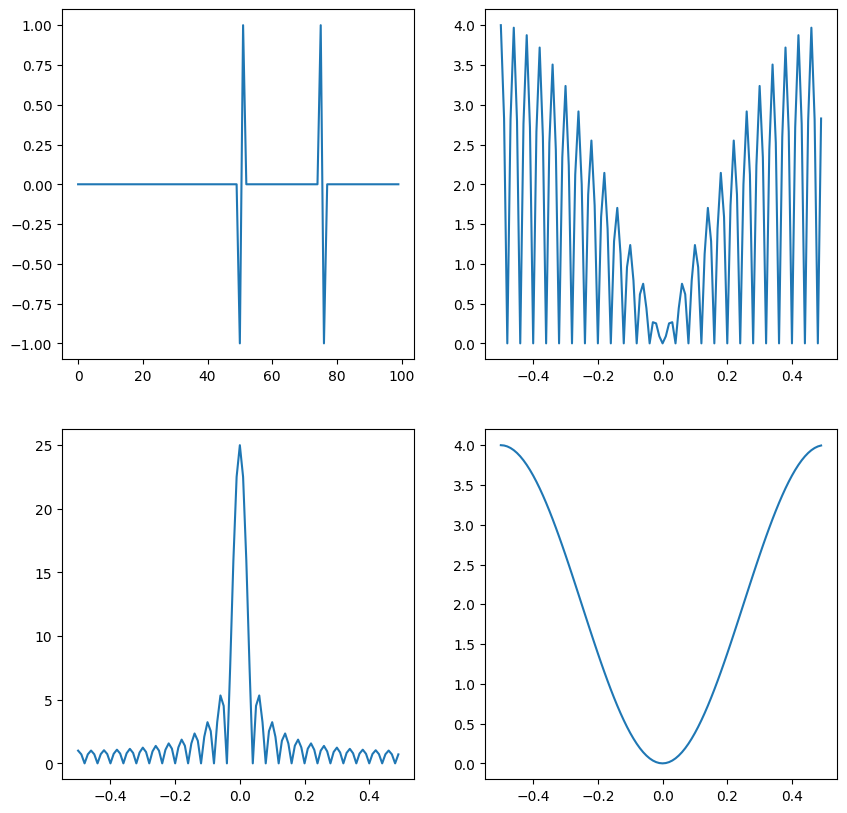

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()
axs[0].plot(conv_dft)
axs[1].plot(fftshift(freq), fftshift(np.absolute(VK)))
axs[2].plot(fftshift(freq), fftshift(np.absolute(V)))
axs[3].plot(fftshift(freq), fftshift(np.absolute(K)))

## 4. Using the command `scipy.signal.convolve`

Check out the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html).


In [67]:
ti = time.time()
conv = signal.convolve(v, k, mode="valid")
tf = time.time()

elapsed = tf - ti
print("Elapsed time: %1.2e" % elapsed)

Elapsed time: 1.90e-04


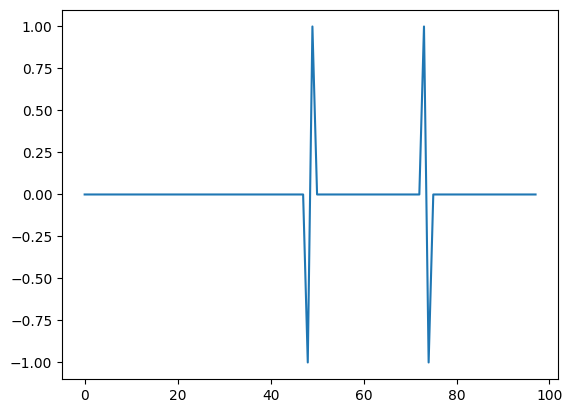

In [68]:
plt.plot(conv)